In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment

import numpy as np
import pandas as pd
import tdt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from scipy.signal import butter, filtfilt
from sklearn.linear_model import LinearRegression
from hc_extension import *

In [2]:
experiment_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac"
csv_base_path = r"/Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac_csvs"
brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

In [3]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn4-250121-084228/Notes.txt
read from t=0s to t=1861.76s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn7-250121-094048/Notes.txt
read from t=0s to t=1839.16s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn8-250121-101912/Notes.txt
read from t=0s to t=1836.57s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn6-250120-085156/Notes.txt
read from t=0s to t=1779.76s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn5-250120-081227/Notes.txt
read from t=0s to t=1772.86s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohort-3/C3_Home_Cage/nac/nn1-250120-063024/Notes.txt
read from t=0s to t=1833.87s
Found Synapse note file: /Users/naylajimenez/Downloads/papers/dopamine/cohor

In [4]:
bout_definitions = [
    {'prefix': 'Short_Term', 'introduced': 'Short_Term_Introduced', 'removed': 'Short_Term_Removed'},
    {'prefix': 'Long_Term', 'introduced': 'Long_Term_Introduced', 'removed': 'Long_Term_Removed'},
    {'prefix': 'Novel', 'introduced': 'Novel_Introduced', 'removed': 'Novel_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions)

Processing behaviors for nn4-250121-084228...
Processing behaviors for nn7-250121-094048...
Processing behaviors for nn8-250121-101912...
Processing behaviors for nn6-250120-085156...
Processing behaviors for nn5-250120-081227...
Processing behaviors for nn1-250120-063024...
Processing behaviors for nn3-250121-074834...
Processing behaviors for nn2-250120-072910...


## Total Investigation Time & Average Bout Duration

In [5]:
# cohort 3 nac
nn1 = experiment.trials['nn1-250120-063024']
nn2 = experiment.trials['nn2-250120-072910']
nn3 = experiment.trials['nn3-250121-074834']
nn4 = experiment.trials['nn4-250121-084228']
nn5 = experiment.trials['nn5-250120-081227']
nn6 = experiment.trials['nn6-250120-085156']
nn7 = experiment.trials['nn7-250121-094048']
nn8 = experiment.trials['nn8-250121-101912']

'''
# cohort 3 mpfc
nn1 = experiment.trials['pp1-250120-094415']
# nn2 = experiment.trials['nn2-250120-072910']
nn3 = experiment.trials['pp3-250121-055222']
nn4 = experiment.trials['pp4-250121-065035']
nn5 = experiment.trials['pp5-250121-110144']
nn6 = experiment.trials['pp6-250121-114116']
nn7 = experiment.trials['pp7-250121-134131']
nn8 = experiment.trials['pp8-250121-142227']
'''

# Read each CSV into a DataFrame
df1 = nn1.behaviors
df2 = nn2.behaviors
df3 = nn3.behaviors
df4 = nn4.behaviors
df5 = nn5.behaviors
df6 = nn6.behaviors
df7 = nn7.behaviors
df8 = nn8.behaviors
# df8 = nn8.behaviors

# Create a list of the DataFrames
trials = [df1, df2, df3, df4, df5, df6, df7, df8]

# Create one combined summary DataFrame (7 subjects total)
summary_df = create_subject_summary_df(trials)

# --- Behavior Processing for Each Subject ---
for nn in [nn1, nn2, nn3, nn4, nn5, nn6, nn7, nn8]:
    # Merge consecutive Investigation events that occur within 1 second.
    nn.combine_consecutive_behaviors(behavior_name='Investigation', bout_time_threshold=1)
    # Remove Investigation events shorter than 0.5 seconds (or adjust as needed).
    nn.remove_short_behaviors(behavior_name='Investigation', min_duration=0.5)


In [6]:
summary_df

,Bout,Behavior,Event_Start,Event_End,Duration (s),Subject,Total Investigation Time,Average Bout Duration
0,Long_Term-1,Approach,1468.4,1471.099,2.699,1,177.089,44.27225
1,Long_Term-1,Approach,1571.6,1572.999,1.399,1,177.089,44.27225
2,Long_Term-1,Investigation,1471.1,1473.200,2.100,1,177.089,44.27225
3,Long_Term-1,Investigation,1481.0,1484.200,3.200,1,177.089,44.27225
4,Long_Term-1,Investigation,1503.8,1506.300,2.500,1,177.089,44.27225
...,...,...,...,...,...,...,...,...
339,Short_Term-2,Investigation,1625.4,1625.800,0.400,8,169.295,42.32375
340,Short_Term-2,Investigation,1633.0,1633.200,0.200,8,169.295,42.32375
341,Short_Term-2,Investigation,1643.4,1644.100,0.700,8,169.295,42.32375
342,Short_Term-2,Investigation,1766.1,1766.600,0.500,8,169.295,42.32375


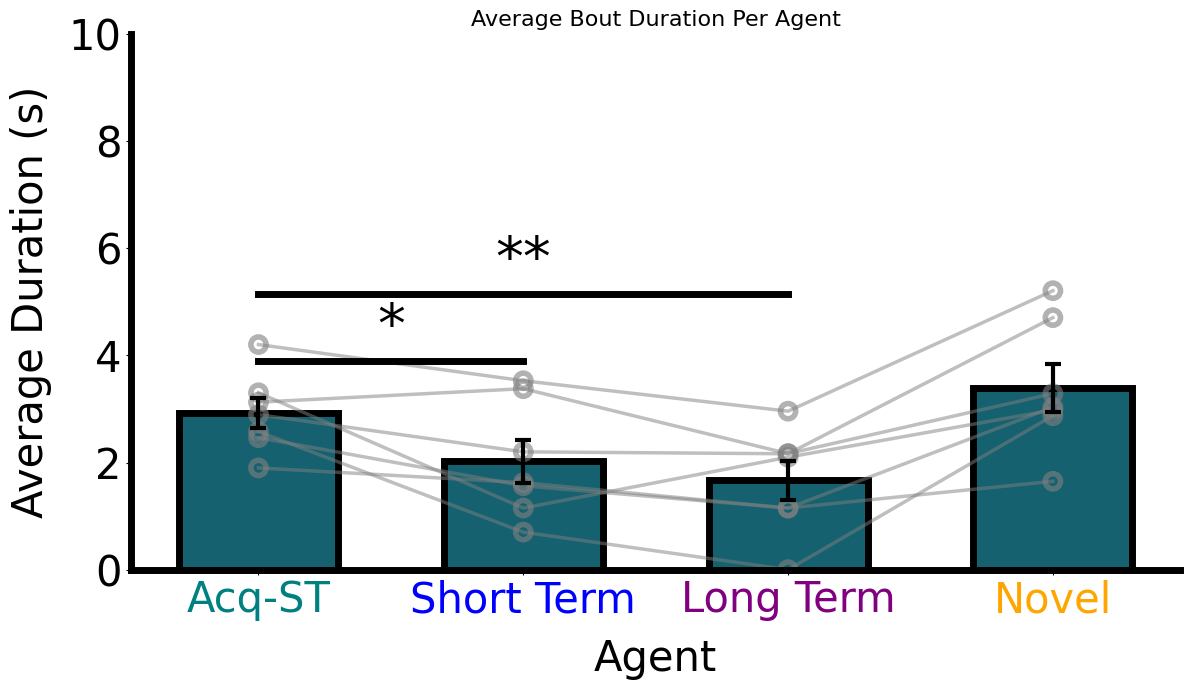

In [7]:
# --- Filter Summary DataFrame by Specific Bouts ---
desired_bouts = ["Short_Term-1", "Short_Term-2", "Long_Term-1", "Novel-1"]
filtered_summary_df = summary_df[summary_df["Bout"].isin(desired_bouts)]

# get rid of 5
filtered_df = filtered_summary_df[filtered_summary_df['Subject'] != 5]

# Group by Subject and Bout and sum Duration (s) to ensure unique pairs
grouped_df = filtered_df.groupby(["Subject", "Bout"], as_index=False)["Duration (s)"].mean()

# Pivot the grouped DataFrame so that rows are subjects and columns are bouts
pivot_df = grouped_df.pivot(index="Subject", columns="Bout", values="Duration (s)")
pivot_df = pivot_df.fillna(0)  # Fill missing values with 0

# Define the desired order of the bars
desired_order = ["Acq-ST", "Short Term", "Long Term", "Novel"]

# Map original bout names to new labels
bout_rename_mapping = {
    "Short_Term-1": "Acq-ST",
    "Short_Term-2": "Short Term",
    "Long_Term-1": "Long Term",
    "Novel-1": "Novel"
}

# Rename columns in pivot_df
pivot_df = pivot_df.rename(columns=bout_rename_mapping)

# Reorder columns based on desired order
pivot_df = pivot_df[desired_order]  # This ensures the bars are plotted in this order

# Then call your plotting function
plot_y_across_bouts_gray(
    df=pivot_df,
    title="Average Bout Duration Per Agent",
    ylabel="Average Duration (s)",
    custom_xtick_labels=["Acq-ST", "Short Term", "Long Term", "Novel"],
    custom_xtick_colors=["teal", "blue", "purple", "orange"],
    ylim=(0, 10),
    bar_color=brain_region,
    yticks_increment=2,
    xlabel="Agent",
    figsize=(12,7),
    pad_inches=0.1
)

In [8]:
pivot_df

Bout,Acq-ST,Short Term,Long Term,Novel
Subject,,,,
1,3.127840,3.380000,2.166444,3.289211
2,1.899929,1.625000,1.149833,3.033333
3,4.204364,3.528571,2.960000,5.210889
4,2.895522,2.200000,2.164143,4.707462
6,2.577667,0.700000,0.000000,2.875000
7,2.464143,1.566667,1.149917,1.650000
8,3.303808,1.150000,2.099889,2.982176
